## Overview

Portfolio Attribution helps you better understand the return drivers of your investment strategy. One simple and intuitive approach is **Brinson Attribution**. 

## Intuition

The Brinson model could be called **asset-grouping model** in the sense that it isolates attributions effects by comparing the returns of variously constructed portfolios, or groups of assets.

By way of example, let’s say we wanted to understand whether our excess performance came from allocation decisions — being overweight or underweight a given sector — or selection decisions — out ability to pick the right stocks within sectors. Here’s how it might look:

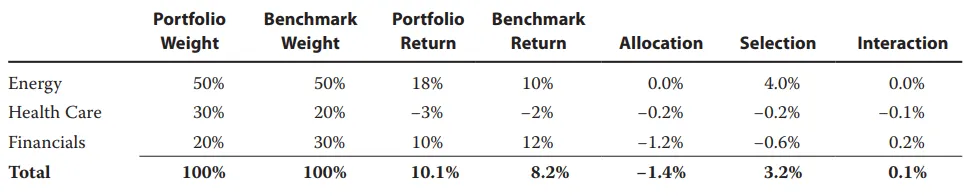

Interpreting the table (from left to right):

* **Sector Weights (or, Sector Exposures):** Relative to the benchmark, our portfolio is neutral on Energy, overweight Health Care, and underweight Financials.
* **Sector Returns:** This is that part about “comparing the returns of variously constructed portfolios or groups of assets.” Total portfolio return = 50% x 18% + 30% x -3% + 20% x 10% = 10.1%; Total benchmark return = 50% x 10% + 20% x -2% + 30% x 12% = 8.2%. This means that we have 1.9% in excess returns that needs to be attributed.
* **Allocation Decisions (lost 1.4%):** The two meaningful sector decisions (healthcare and financials) did not pay off. For example, we had a 10% underweight in financials and it was the top performing sector.
* **Selection Decisions (gained 3.2%):** Our losses in allocation, were offset by our ability to add value making stock decisions (relative to the benchmark) within the Energy sector.



In [1]:
import pandas as pd
from typing import Union

In [2]:
asset_data = pd.read_csv("")
bm_wts_col = "bm_wt"
por_wts_col = "por_wt"
grouping_level = "sector"
rets_col = "ret_1mf"

def calc_brinson_by_month(data: pd.DataFrame, 
                          por_wts_col: str, 
                          bm_wts_col: str, 
                          rets_col: str,
                          grouping_level: Union[str, list]) -> pd.DataFrame:
    '''
    :param data (pandas.DataFrame):
    :param por_wts_col (str):
    :param bm_wts_col (str):
    :param rets_col (str):
    :param grouping_level (str or list):
    :return (pandas.DataFrame):
    '''
    grps = data.groupby([grouping_level])

    def aggs_by_grp(x: pd.DataFrame, por_wts_col: str, bm_wts_col: str, rets_col: str):

        x[rets_col] = x[rets_col].fillna(x[rets_col].median())
        
        bm_wt = x[bm_wts_col].sum()
        por_wt = x[por_wts_col].sum()

        bm_ret = x[rets_col].dot(x[bm_wts_col] / bm_wt)
        por_ret = x[por_wts_col].dot(x[por_wts_col] / por_wt)

        bm_cont = bm_wt * bm_cont
        allocation = (por_wt - bm_wt) * bm_ret
        selection = (por_ret - por_wt) * por_ret
        interaction = (por_wt - bm_wt) * (por_ret - bm_ret)

        selection_cln = 0 if pd.isnull(selection) else selection
        interaction_cln = 0 if pd.isnull(interaction) else interaction

        return pd.Series(
            {
                "por_wt": por_wt,
                "bm_wt": bm_wt,
                "act_wt": por_wt - bm_wt,
                "por_ret": por_ret,
                "bm_ret": bm_ret,
                "bm_cont": bm_cont,
                "allocation": allocation,
                "selection": selection_cln,
                "interaction": interaction_cln,
                "selection_and_interaction": selection_cln + interaction_cln,
                "total": allocation + selection_cln + interaction_cln
            }
        )
    
    aggs = grps.apply(lambda x: aggs_by_grp(x, por_wts_col, bm_wts_col, rets_col))

    return aggs

brinson = asset_data.groupby("Date").apply(lambda x: calc_brinson_by_month(x, por_wts_col, bm_wts_col, rets_col, grouping_level)).reset_index()

# brinson.to_csv("", index=False)

SyntaxError: invalid syntax (2738696001.py, line 2)